<a href="https://colab.research.google.com/github/Sahil9424r/Eyes_open_close_detection/blob/main/Eyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
path = "/content/drive/MyDrive/kaggle/kaggle.json"

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d prasadvpatil/mrl-dataset

Dataset URL: https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset
License(s): CC0-1.0
  0% 0.00/22.6M [00:00<?, ?B/s]
100% 22.6M/22.6M [00:00<00:00, 1.47GB/s]


In [ ]:
!unzip -o /content/mrl-dataset.zip

Archive:  /content/mrl-dataset.zip
  inflating: train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00015_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00016_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00017_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s000

In [ ]:
import numpy as np
import pandas as pd
import cv2
import PIL
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,Rescaling,BatchNormalization,Conv2D,MaxPooling2D,Flatten,InputLayer

from tensorflow.keras import models,Sequential
from tensorflow.keras.callbacks import EarlyStopping
e=EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
print(tf.keras.__version__)
print(tf.__version__)
print(np.__version__)

3.8.0
2.18.0
2.0.2


(86, 86, 3)
[[[38 38 38]
  [41 41 41]
  [44 44 44]
  ...
  [89 89 89]
  [89 89 89]
  [89 89 89]]

 [[38 38 38]
  [41 41 41]
  [44 44 44]
  ...
  [92 92 92]
  [92 92 92]
  [91 91 91]]

 [[38 38 38]
  [41 41 41]
  [43 43 43]
  ...
  [94 94 94]
  [93 93 93]
  [93 93 93]]

 ...

 [[52 52 52]
  [54 54 54]
  [60 60 60]
  ...
  [78 78 78]
  [78 78 78]
  [80 80 80]]

 [[51 51 51]
  [53 53 53]
  [59 59 59]
  ...
  [81 81 81]
  [81 81 81]
  [81 81 81]]

 [[51 51 51]
  [51 51 51]
  [55 55 55]
  ...
  [80 80 80]
  [80 80 80]
  [82 82 82]]]
AxesImage(shape=(86, 86, 3))


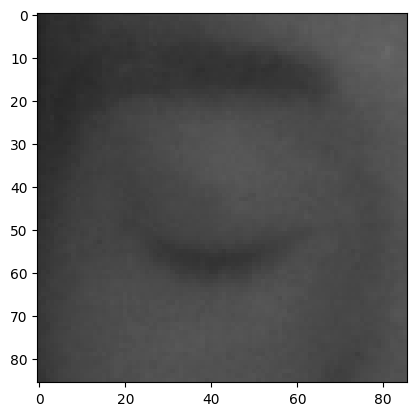

In [ ]:
p='/content/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png'
i=cv2.imread(p) # that why 256,256 kiya
print(i.shape)
print(i)
print(plt.imshow(i))
# p1='/content/train/Open_Eyes/s0001_02334_0_0_1_0_0_01.png'
# i1=cv2.imread(p1)
# print(i1.shape)
# plt.imshow(i1)

In [ ]:
ims=256
bs=32
tr=tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    image_size=(ims,ims),
    batch_size=bs,
    validation_split=0.2,
    subset='training',
    shuffle=True,

    seed=42,


)
valds=tr=tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    image_size=(ims,ims),
    batch_size=bs,
    shuffle=True,
   validation_split=0.2,
    subset="validation",
    seed=42,


)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [ ]:
tr.class_names,valds.class_names


(['Closed_Eyes', 'Open_Eyes'], ['Closed_Eyes', 'Open_Eyes'])

In [ ]:
l = tr.class_names
l

['Closed_Eyes', 'Open_Eyes']

In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),

])
Rescaling_layer=Rescaling(1./255)

In [ ]:
model = Sequential()
model.add(Rescaling_layer)
model.add(data_augmentation)
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(256,256,3))),
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(tr,validation_data=valds,batch_size=bs,epochs=10,callbacks=[e])

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - accuracy: 0.5248 - loss: 0.6884 - val_accuracy: 0.6662 - val_loss: 0.5938
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.7955 - loss: 0.5131 - val_accuracy: 0.8050 - val_loss: 0.3432
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.8636 - loss: 0.3328 - val_accuracy: 0.8263 - val_loss: 0.4558
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.8663 - loss: 0.3062 - val_accuracy: 0.9275 - val_loss: 0.1707
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9291 - loss: 0.1744 - val_accuracy: 0.9538 - val_loss: 0.1383
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.9289 - loss: 0.1787 - val_accuracy: 0.9613 - val_loss: 0.1085
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.9556 - loss: 0.1164 - val_accuracy: 0.9525 - val_loss: 0.1020
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9628 - loss: 0.1045 - val_accuracy: 0

In [ ]:
# Get 1 batch from training dataset
for images, labels in tr.take(1):
    preds_tr = model.predict(images)
    pred_classes_tr = (preds_tr > 0.5).astype("int32").flatten()

    print("\n--- Training Set Predictions ---")
    for i in range(10):
        actual = l[labels[i].numpy()]
        predicted = l[pred_classes_tr[i]]
        confidence = preds_tr[i][0]
        print(f"{i+1}. Actual: {actual}, Predicted: {predicted}, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

--- Training Set Predictions ---
1. Actual: Open_Eyes, Predicted: Open_Eyes, Confidence: 1.00
2. Actual: Open_Eyes, Predicted: Open_Eyes, Confidence: 1.00
3. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.02
4. Actual: Open_Eyes, Predicted: Open_Eyes, Confidence: 1.00
5. Actual: Open_Eyes, Predicted: Open_Eyes, Confidence: 0.99
6. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.00
7. Actual: Open_Eyes, Predicted: Open_Eyes, Confidence: 1.00
8. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.01
9. Actual: Open_Eyes, Predicted: Open_Eyes, Confidence: 0.99
10. Actual: Open_Eyes, Predicted: Closed_Eyes, Confidence: 0.11


In [ ]:
# Get 1 batch from validation dataset
for images, labels in valds.take(1):
    preds_val = model.predict(images)
    pred_classes_val = (preds_val > 0.5).astype("int32").flatten()

    print("\n--- Validation Set Predictions ---")
    for i in range(10):
        actual = l[labels[i].numpy()]
        predicted = l[pred_classes_val[i]]
        confidence = preds_val[i][0]
        print(f"{i+1}. Actual: {actual}, Predicted: {predicted}, Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

--- Validation Set Predictions ---
1. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.00
2. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.01
3. Actual: Open_Eyes, Predicted: Open_Eyes, Confidence: 0.80
4. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.00
5. Actual: Open_Eyes, Predicted: Open_Eyes, Confidence: 1.00
6. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.11
7. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.00
8. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.00
9. Actual: Closed_Eyes, Predicted: Closed_Eyes, Confidence: 0.01
10. Actual: Open_Eyes, Predicted: Open_Eyes, Confidence: 1.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


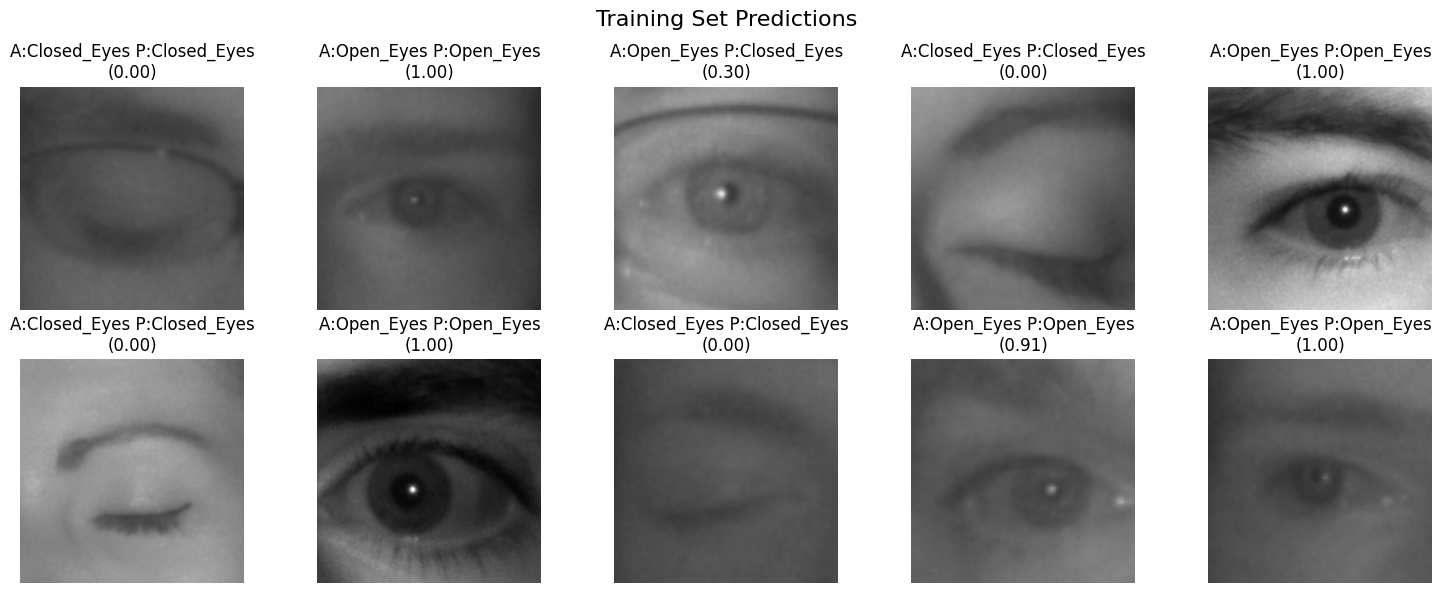

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


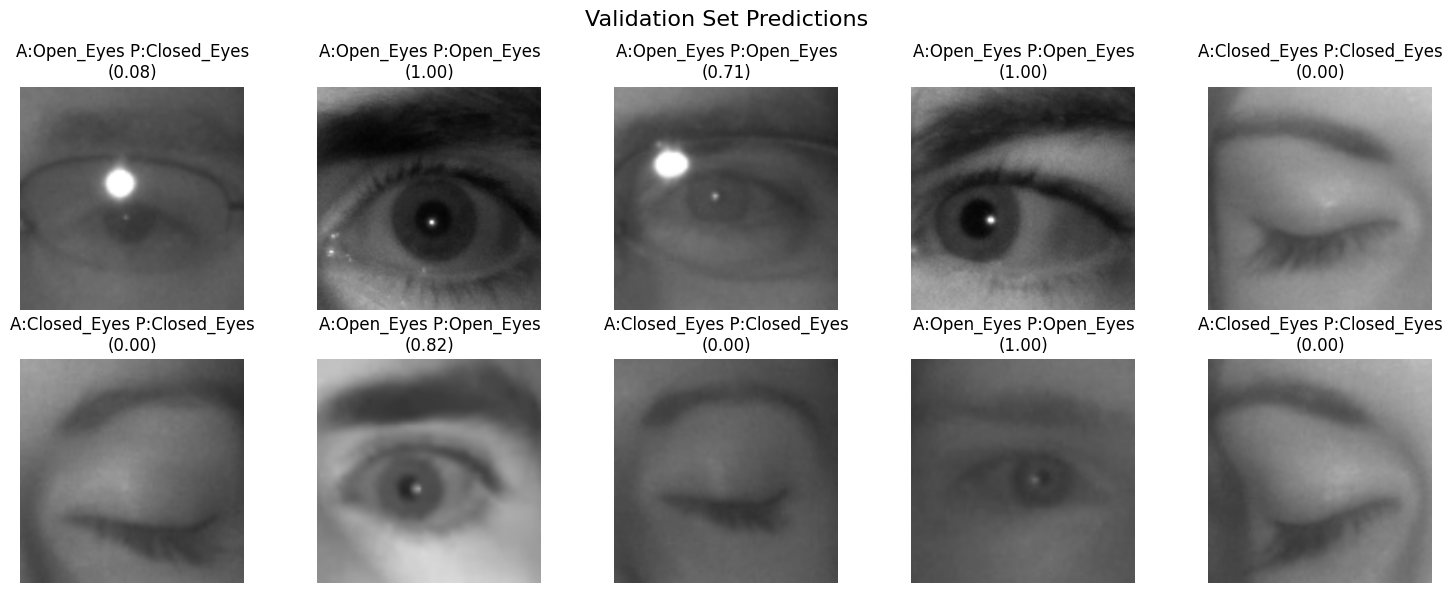

In [ ]:


def show_predictions(images, labels, preds, class_names, title):
    pred_classes = (preds > 0.5).astype("int32").flatten()
    plt.figure(figsize=(15, 6))
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual = class_names[labels[i].numpy()]
        predicted = class_names[pred_classes[i]]
        confidence = preds[i][0]
        plt.title(f"A:{actual} P:{predicted}\n({confidence:.2f})")
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# For training
for images, labels in tr.take(1):
    preds = model.predict(images)
    show_predictions(images, labels, preds, l, "Training Set Predictions")

# For validation
for images, labels in valds.take(1):
    preds = model.predict(images)
    show_predictions(images, labels, preds, l, "Validation Set Predictions")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Prediction score: 1.00
Predicted class: Open_Eyes


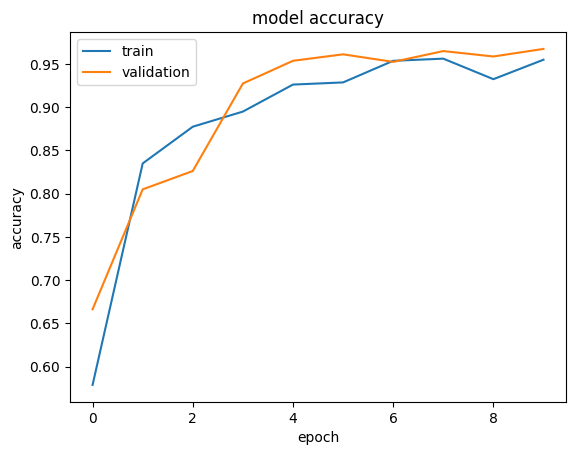

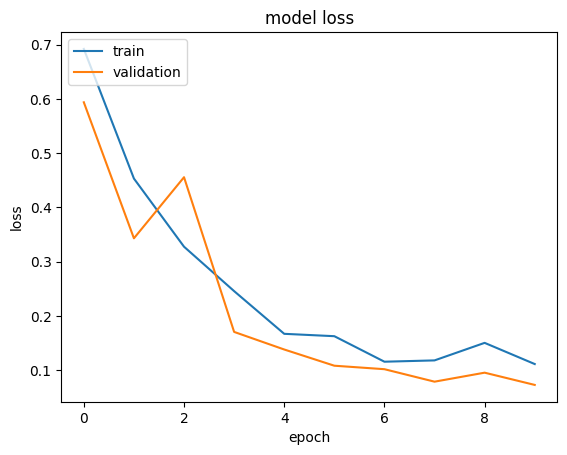

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
i=cv2.imread('/content/t1.jpg')
print(plt.imshow(i))
g=cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
print(plt.imshow(g))
g=cv2.resize(g,(256,256))
g=g/255.0
print(g)
a=model.predict(np.expand_dims(g,axis=0))
if(a[0][0]>0.5):
  print(l[1])
else:
  print(l[0])

In [ ]:
i=cv2.imread('/content/t2.webp')
print(plt.imshow(i))
g=cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
print(plt.imshow(g))
g=cv2.resize(g,(256,256))
g=g/255.0

a=model.predict(np.expand_dims(g,axis=0))
if(a[0][0]>0.5):
  print(l[1])
else:
  print(l[0])

In [ ]:
# model.save('eyes.keras')

In [ ]:
# model.save('eyes.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []
m=tf.keras.models.load_model('/content/eyes.keras')

for images, labels in valds:
    preds = m.predict(images)
    y_true.extend(labels.numpy())
    # y_pred.extend((preds > 0.5).astype("int32").flatten())
    y_pred.extend(preds)


# print(confusion_matrix(y_true, y_pred))
# print(classification_report(y_true, y_pred, target_names=l))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [ ]:
# print(np.array(y_true)[:50])
# print(np.array(y_pred)[:50])
print(np.average(np.array(y_pred)))

0.5030873


<Axes: >

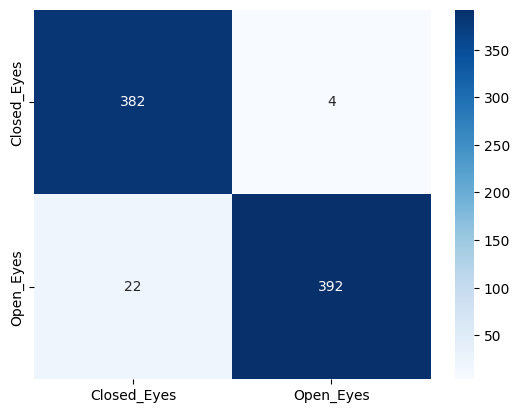

In [ ]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)

In [ ]:
l1 = []  # predicted labels
l2 = []  # true labels

for i, j in valds.take(1):
    img_tensor = i[0]           # TensorFlow tensor
    img_array = img_tensor.numpy()   # NumPy array
    img = Image.fromarray((img_array * 255).astype(np.uint8))
    img.show()
    preds = model.predict(i)
    for p in preds:
        l1.append(1 if p[0] > 0.5 else 0)
    l2.extend(j.numpy().tolist())  # Convert np.int32 to regular int

print("pred", l1)
print("true", l2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
pred [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
true [1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
